In [5]:
import pandas as pd

trade = pd.read_csv('./data/trade-register.csv', skiprows=11)

Index(['SIPRI AT Database ID', 'Supplier', 'Recipient', 'Designation',
       'Description', 'Armament category', 'Order date',
       'Order date is estimate', 'Numbers delivered',
       'Numbers delivered is estimate', 'Delivery year',
       'Delivery year is estimate', 'Status', 'SIPRI estimate',
       'TIV deal unit', 'TIV delivery values', 'Local production'],
      dtype='object')

In [21]:
supplier_tivdv = trade[['Supplier', 'TIV delivery values', 'Delivery year']]
(
    supplier_tivdv.groupby(['Supplier', 'Delivery year']).sum().xs(2023, level='Delivery year')
                  .sort_values(by='TIV delivery values', ascending=False)
)

,TIV delivery values
Supplier,
United States,11287.01
Germany,3287.07
China,2431.71
France,2012.17
Italy,1436.81
Russia,1268.70
United Kingdom,1203.78
Israel,1158.76
Spain,939.54


In [37]:
(
    supplier_tivdv.query('`Delivery year` in [2022, 2023]').groupby(['Supplier', 'Delivery year']).sum()
                  .unstack(level='Delivery year').dropna().T.pct_change().T.iloc[:, 1]
                  .rename('%change 22-23').sort_values(ascending=False)
)

Supplier
Croatia                9.097436
Brazil                 5.420927
Pakistan               5.333333
Portugal               4.101010
India                  3.941176
Sweden                 3.508833
Morocco                2.500000
Norway                 2.099762
Austria                2.080645
South Korea            2.047439
Germany                1.219404
Slovakia               1.154882
Australia              1.043399
unknown supplier(s)    0.919699
Canada                 0.626934
Estonia                0.415948
Iran                   0.354679
Israel                 0.331418
Poland                 0.190658
China                  0.167609
Turkiye                0.138883
Greece                 0.000000
Romania                0.000000
Spain                 -0.031222
Italy                 -0.162742
UAE                   -0.183563
Netherlands           -0.201505
Finland               -0.213930
Denmark               -0.248734
United States         -0.276104
United Kingdom        -0.277096

<Axes: xlabel='Delivery year'>

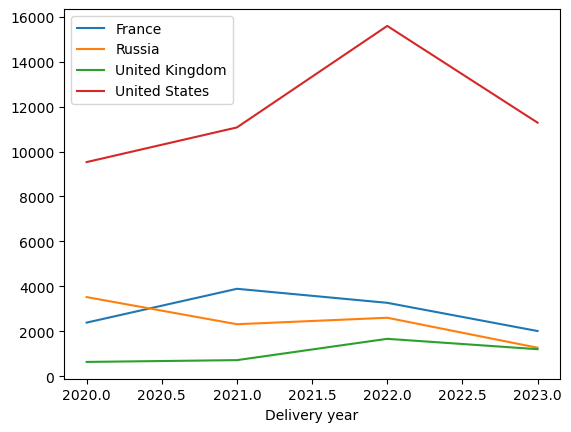

In [45]:
qst = (
   '`Delivery year` in [2020, 2021, 2022, 2023] and'
   ' Supplier in ["France", "United States", "United Kingdom", "Russia"]'    
)
supplier_by_country = (
    supplier_tivdv.query(qst).groupby(['Supplier', 'Delivery year']).sum()
                  .unstack(level='Supplier')
)
supplier_by_country.columns = supplier_by_country.columns.map(lambda x: x[1])
supplier_by_country.plot(kind='line')


In [61]:
recipient_tivdv = trade[['Recipient', 'TIV delivery values', 'Delivery year']]
recipient_by_country = (
    recipient_tivdv.query('`Delivery year` == 2023').drop('Delivery year', axis=1)
                   .groupby(['Recipient']).sum().dropna()
)
recipient_by_country.sort_values(by='TIV delivery values', ascending=False)

,TIV delivery values
Recipient,
Ukraine,4012.22
Pakistan,2129.35
Qatar,1805.47
India,1428.35
Poland,1374.34
...,...
Belize,1.00
Georgia,0.60
Antigua and Barbuda,0.30


In [62]:
ukraine_imports = (
    trade.query('Recipient == "Ukraine" and `Delivery year` == 2023')
         .loc[:, ['Supplier', 'Armament category', 'TIV delivery values']]
         .groupby(['Supplier', 'Armament category']).sum()
)
ukraine_imports

TIV delivery values
Supplier            Armament category                     
Australia           Armoured vehicles                 7.00
Belgium             Armoured vehicles                17.80
                    Missiles                          3.30
Canada              Armoured vehicles               141.46
                    Missiles                         25.68
...                                                    ...
United States       Armoured vehicles               316.97
                    Artillery                        41.92
                    Missiles                       1178.40
                    Sensors                         137.00
unknown supplier(s) Armoured vehicles                 5.36

[74 rows x 1 columns]